###  *Analizar una serie de tiempo con datos históricos para ajustarla de forma óptima a un modelo Box-Jenkins ARIMA(p,d,q)

* Considera nuevamente la información histórica de temperaturas promedio por año para la ciudad de Nueva York en el período 1870 -2020.
* (disponibles en el sitio: https://github.com/JoseRaulCastro/EBAC/blob/main/TempNY.csv).
* Determina mediante la gráfica de prueba de Dickey-Fuller si los datos son estacionarios considerando una base de entrenamiento del 90% del total. En caso negativo, aplica tantas diferencias como sea necesario para alcanzar la estacionariedad y comenta al respecto.
* Obtén los parámetros óptimos mediante el índice de información de Akaike (a partir del resultado anterior), compara al menos 6 combinaciones diferentes de parámetros p, d y q en el modelo general ARIMA(p, d, q).
* Haz una gráfica (al resultado óptimo obtenido previamente) que incluya los datos de prueba, los de entrenamiento, y las predicciones puntuales y de intervalo para la base de prueba. 
* Responde a la pregunta: ¿Son confiables sus pronósticos? Justifica tu respuesta con los indicadores del error vistos en este curso.

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [36]:
temp = pd.read_csv('C:/Users/Isaac/Desktop/IHD/EBAC DT/CIENCIA DE DATOS/M56 DS/TempNY.csv')
temp = temp.dropna(axis = 1, how = 'all')
temp

,Year,Average
0,1870,53.60
1,1871,51.13
2,1872,50.98
3,1873,50.98
4,1874,51.34
...,...,...
146,2016,57.18
147,2017,56.22
148,2018,55.88
149,2019,55.62


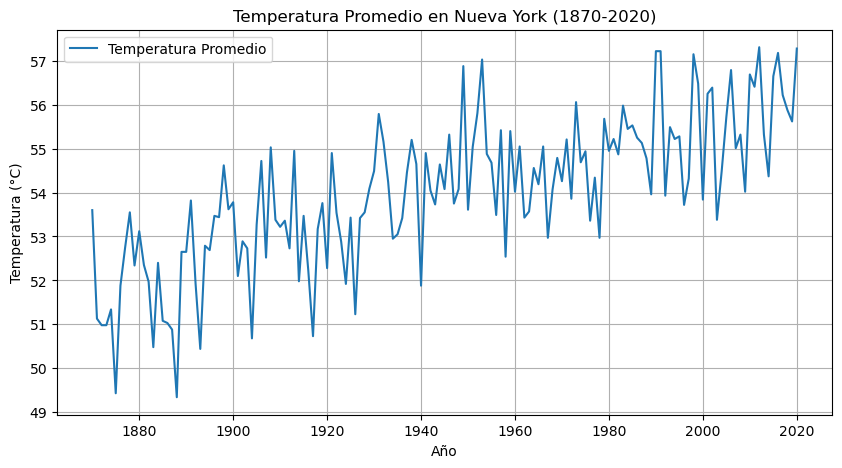

In [37]:
plt.figure(figsize=(10, 5))
plt.plot(temp['Year'], temp['Average'], label='Temperatura Promedio')
plt.title('Temperatura Promedio en Nueva York (1870-2020)')
plt.xlabel('Año')
plt.ylabel('Temperatura (°C)')
plt.legend()
plt.grid(True)
plt.show()

In [43]:
# Prueba de Dickey-Fuller para estacionariedad con la base de entrenamiento del 90% 

len_train = int(len(temp) * 0.9)
len_test = int(len(temp) * 0.1)

train ,test = temp['Average'][:len_train], temp['Average'][len_train:]

# Prueba de Dickey-Fuller en la serie original
res = adfuller(train)
print(f'El valor de p para la prueba Dickey-Fuller es:',res[1])

El valor de p para la prueba Dickey-Fuller es: 0.4220120619118094


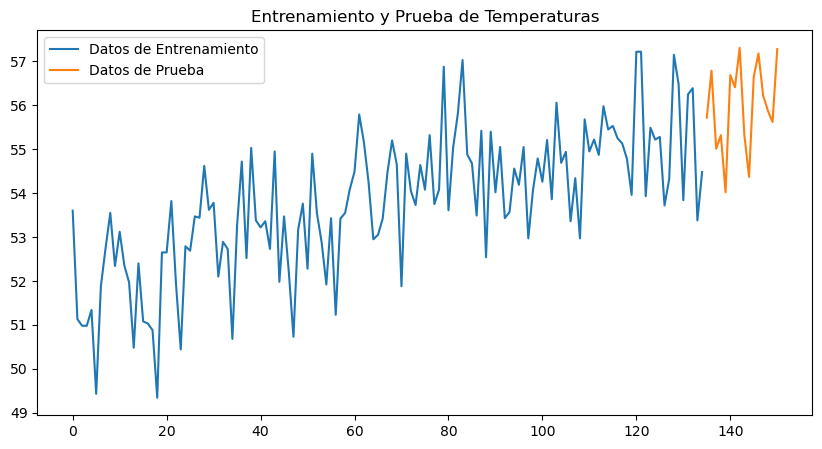

In [44]:
# Visualización de la serie temporal
plt.figure(figsize=(10, 5))
plt.plot(train, label='Datos de Entrenamiento')
plt.plot(test, label='Datos de Prueba')
plt.title('Entrenamiento y Prueba de Temperaturas')
plt.legend()
plt.show()

* Conclusión: Si el p-valor es mayor a 0.05, no es estacionario, por lo que necesitamos diferenciar la serie.

In [45]:
# Primera diferencia
train_diff = train.diff().dropna()
result_diff = adfuller(train_diff)
print(f'El valor de p para la prueba Dickey-Fuller es:',result_diff[1])

El valor de p para la prueba Dickey-Fuller es: 1.5713108896120512e-13


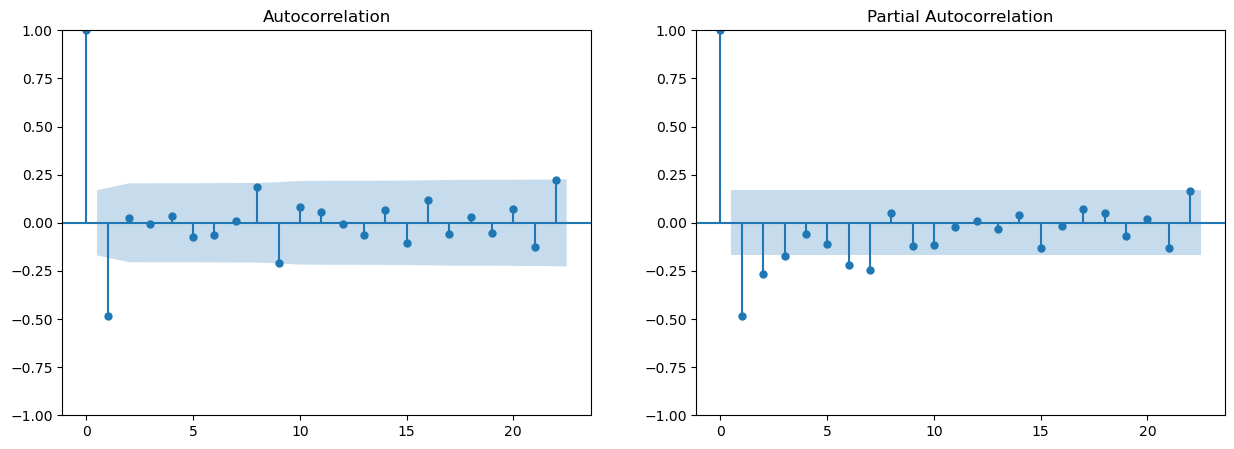

In [49]:
# Usamos los gráficos de ACF (Autocorrelation Function) y PACF (Partial Autocorrelation Function)
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
plot_acf(train_diff, ax=axes[0])
plot_pacf(train_diff, ax=axes[1])
plt.show()

In [50]:
# Comparar combinaciones de ARIMA(p, d, q)
# Probaremos diferentes combinaciones de parámetros y elegiremos el mejor modelo según el criterio de información de Akaike (AIC).
best_aic = np.inf
best_order = None
best_model = None

for p in range(3):
    for d in range(3):
        for q in range(3):
            try:
                model = ARIMA(train, order=(p, d, q)).fit()
                if model.aic < best_aic:
                    best_aic = model.aic
                    best_order = (p, d, q)
                    best_model = model
            except:
                continue

print(f"Mejor modelo ARIMA{best_order} con AIC={best_aic}")

Mejor modelo ARIMA(0, 1, 1) con AIC=433.6565090059378


In [60]:
# Entrenamos el mejor modelo con la base completa de entrenamiento y evaluamos su rendimiento.
model = ARIMA(train, order = best_order).fit()

# Predicciones para el conjunto de prueba
predicciones = model.forecast(steps = len(test))

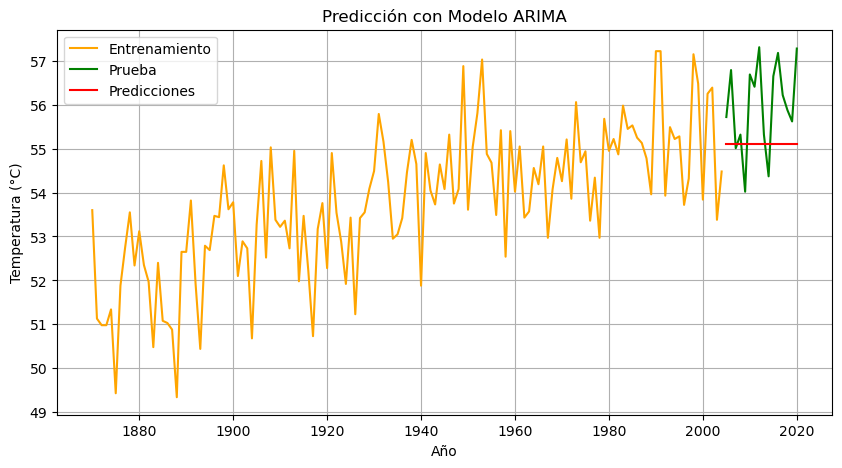

In [64]:
# Gráfica de predicciones

plt.figure(figsize=(10, 5))
plt.plot(temp['Year'][:len_train], train, label='Entrenamiento', color = 'orange')
plt.plot(temp['Year'][len_train:], test, label='Prueba', color = 'green')
plt.plot(temp['Year'][len_train:], predicciones, label='Predicciones', linestyle='solid', color = 'red')
plt.title('Predicción con Modelo ARIMA')
plt.xlabel('Año')
plt.ylabel('Temperatura (°C)')
plt.legend()
plt.grid(True)
plt.show()


### * Podemos considerar que el modelo tiene un buen desempeño en la predicción.